# WMAZE Model 7
## Models:
### conditional after corr/incorr fixed
### Fixed pairs -- same (AA & CC)
### Fixed pairs -- change (AC & CA)
### "Lost" fixed -- fixed followed by BL trial
### Nonresponse
## Does NOT model:
### Baseline trials
### Conditional trials

## Compares activation for regions of interest using binarized masks:
### Hippocampus (FS labels: hippocampus [17, 53])
### Dorsal caudate (hand-drawn by Mandy)
### Putamen (FS labels: putamen [12, 51])

In [1]:
import os
from glob import glob

sids = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',  
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


proj_dir = '/home/data/madlab/data/mri/wmaze'
 
mask_filenames = []
cope_files = []

for SID in sids:
    mask_filenames_glob = glob(proj_dir + '/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_' 
                               + SID + '/_anatmask_xfm*/*')
    mask_filenames.append(mask_filenames_glob)

    subjcopes_glob = glob(proj_dir + '/scndlvl/wmaze_MRthesis/cond_after_fixeditional/model7-2ndTrial/' 
                          + SID + '/fixedfx/cope_*')
    cope_files.append(subjcopes_glob)
    if len(cope_files[-1]) == 0:
        print(SID)

## Cell to double-check the array indexing

In [3]:

print 'left hippocampus'
print(mask_filenames[0][0]) #lh-hippocampus
print 'left caudate'
print(mask_filenames[0][1]) #lh-caudate
print 'right caudate'
print(mask_filenames[0][2]) #rh-caudate
print 'right hippocampus'
print(mask_filenames[0][3]) #rh-hippocamus
print 'left putamen'
print(mask_filenames[0][4]) #lh-putamen
print 'right putamen'
print(mask_filenames[0][5]) #rh-putamen

print '-----'
'''
print '##cond_after_fixed_corr'
print(cope_files[0][0]) #cond_after_fixed_corr
print '##cond_after_fixed_incorr'
print(cope_files[0][1]) #cond_after_fixed_incorr
print '##same'
print(cope_files[0][2]) #same
print '##change'
print(cope_files[0][3]) #change
print '##lost'
print(cope_files[0][4]) #lost
print '##FFsame_minus_FFchange'
print(cope_files[0][5]) #FFsame_minus_FFchange
print '##FFchange_minus_FFsame'
print(cope_files[0][6]) #FFchange_minus_FFsame
print '##corr_minus_incorr'
print(cope_files[0][7]) #FFsame_minus_FFchange
print '##incorr_minus_corr'
print(cope_files[0][8]) #FFchange_minus_FFsame
'''
#for i in cope_files:
#    print(len(i))

left hippocampus
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh-hippocampus_warped.nii.gz
left caudate
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/lh_caudate_anat_mask_warped.nii.gz
right caudate
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm0/rh_caudate_anat_mask_warped.nii.gz
right hippocampus
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm1/rh-hippocampus_warped.nii.gz
left putamen
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm2/lh-putamen_warped.nii.gz
right putamen
/home/data/madlab/data/mri/wmaze/roi_analysis/MRthesis/fb4c_2/mask/anat_masks/_subject_id_WMAZE_001/_anatmask_xfm3/rh-putamen_warped.nii.gz
-----


"\nprint '##fixed_before_cond_corr'\nprint(cope_files[0][0]) #fixed_before_cond_corr\nprint '##fixed_before_cond_incorr'\nprint(cope_files[0][1]) #fixed_before_cond_incorr\nprint '##same'\nprint(cope_files[0][2]) #same\nprint '##change'\nprint(cope_files[0][3]) #change\nprint '##lost'\nprint(cope_files[0][4]) #lost\nprint '##FFsame_minus_FFchange'\nprint(cope_files[0][5]) #FFsame_minus_FFchange\nprint '##FFchange_minus_FFsame'\nprint(cope_files[0][6]) #FFchange_minus_FFsame\nprint '##corr_minus_incorr'\nprint(cope_files[0][7]) #FFsame_minus_FFchange\nprint '##incorr_minus_corr'\nprint(cope_files[0][8]) #FFchange_minus_FFsame\n"

### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [2]:
import nibabel as nb
import pandas as pd
import numpy as np


#Dictionary containing multiple arrays referenced by keywords
all_data = {'subjid':[],
            'lhhp_cond_after_fixed_corr':[], 'rhhp_cond_after_fixed_corr':[], 
            'lhhp_cond_after_fixed_incorr':[], 'rhhp_cond_after_fixed_incorr':[],
            'lhhp_same':[], 'rhhp_same':[], 
            'lhhp_change':[], 'rhhp_change':[],          
            
            'lhcaudate_cond_after_fixed_corr':[], 'rhcaudate_cond_after_fixed_corr':[], 
            'lhcaudate_cond_after_fixed_incorr':[], 'rhcaudate_cond_after_fixed_incorr':[],
            'lhcaudate_same':[], 'rhcaudate_same':[], 
            'lhcaudate_change':[], 'rhcaudate_change':[],
            
            'lhputamen_cond_after_fixed_corr':[], 'rhputamen_cond_after_fixed_corr':[], 
            'lhputamen_cond_after_fixed_incorr':[], 'rhputamen_cond_after_fixed_incorr':[],
            'lhputamen_same':[], 'rhputamen_same':[], 
            'lhputamen_change':[], 'rhputamen_change':[]}


# For each interation in the length of subject ids
for i in range(len(sids)):
    #Append the subject id
    all_data['subjid'].append(sids[i])
    #Load the left and right hippocampus mask files using Nibabel 
    lh_hp_img = nb.load(mask_filenames[i][0])
    rh_hp_img = nb.load(mask_filenames[i][3])
    lh_caudate_img = nb.load(mask_filenames[i][1])
    rh_caudate_img = nb.load(mask_filenames[i][2])
    lh_putamen_img = nb.load(mask_filenames[i][4])
    rh_putamen_img = nb.load(mask_filenames[i][5])

    
    #Load copes for individual trial types
    cond_after_fixed_corr_img = nb.load(cope_files[i][0])
    cond_after_fixed_incorr_img = nb.load(cope_files[i][1])
    fixed_same_img = nb.load(cope_files[i][2])
    fixed_change_img = nb.load(cope_files[i][3])

    
    
    ########################
    ### Left Hippocampus ###
    ########################
    
    # cond_after_fixed_corr
    lh_hp_cond_after_fixed_corr_data = cond_after_fixed_corr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_cond_after_fixed_corr'].append(np.mean(lh_hp_cond_after_fixed_corr_data))
    
    # cond_after_fixed_incorr
    lh_hp_cond_after_fixed_incorr_data = cond_after_fixed_incorr_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_cond_after_fixed_incorr'].append(np.mean(lh_hp_cond_after_fixed_incorr_data))
      
    # same
    lh_hp_same_data = fixed_same_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_same'].append(np.mean(lh_hp_same_data)) 
    
    # change
    lh_hp_change_data = fixed_change_img.get_data()[lh_hp_img.get_data() > 0.]
    all_data['lhhp_change'].append(np.mean(lh_hp_change_data)) 

    
    #########################
    ### Right Hippocampus ###
    #########################
    
    # cond_after_fixed_corr
    rh_hp_cond_after_fixed_corr_data = cond_after_fixed_corr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_cond_after_fixed_corr'].append(np.mean(rh_hp_cond_after_fixed_corr_data))
    
    # cond_after_fixed_incorr
    rh_hp_cond_after_fixed_incorr_data = cond_after_fixed_incorr_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_cond_after_fixed_incorr'].append(np.mean(rh_hp_cond_after_fixed_incorr_data))
      
    # same
    rh_hp_same_data = fixed_same_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_same'].append(np.mean(rh_hp_same_data)) 
    
    # change
    rh_hp_change_data = fixed_change_img.get_data()[rh_hp_img.get_data() > 0.]
    all_data['rhhp_change'].append(np.mean(rh_hp_change_data)) 
    
    
    ####################
    ### Left Caudate ###
    ####################
    
    # cond_after_fixed_corr
    lh_caudate_cond_after_fixed_corr_data = cond_after_fixed_corr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_cond_after_fixed_corr'].append(np.mean(lh_caudate_cond_after_fixed_corr_data))
    
    # cond_after_fixed_incorr
    lh_caudate_cond_after_fixed_incorr_data = cond_after_fixed_incorr_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_cond_after_fixed_incorr'].append(np.mean(lh_caudate_cond_after_fixed_incorr_data))
      
    # same
    lh_caudate_same_data = fixed_same_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_same'].append(np.mean(lh_caudate_same_data)) 
    
    # change
    lh_caudate_change_data = fixed_change_img.get_data()[lh_caudate_img.get_data() > 0.]
    all_data['lhcaudate_change'].append(np.mean(lh_caudate_change_data)) 

    
    #####################
    ### Right Caudate ###
    ##################### 
    
    # cond_after_fixed_corr
    rh_caudate_cond_after_fixed_corr_data = cond_after_fixed_corr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_cond_after_fixed_corr'].append(np.mean(rh_caudate_cond_after_fixed_corr_data))
    
    # cond_after_fixed_incorr
    rh_caudate_cond_after_fixed_incorr_data = cond_after_fixed_incorr_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_cond_after_fixed_incorr'].append(np.mean(rh_caudate_cond_after_fixed_incorr_data))
      
    # same
    rh_caudate_same_data = fixed_same_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_same'].append(np.mean(rh_caudate_same_data)) 
    
    # change
    rh_caudate_change_data = fixed_change_img.get_data()[rh_caudate_img.get_data() > 0.]
    all_data['rhcaudate_change'].append(np.mean(rh_caudate_change_data)) 
 
    
    ####################
    ### Left Putamen ###
    ####################
    
    # cond_after_fixed_corr
    lh_putamen_cond_after_fixed_corr_data = cond_after_fixed_corr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_cond_after_fixed_corr'].append(np.mean(lh_putamen_cond_after_fixed_corr_data))
    
    # cond_after_fixed_incorr
    lh_putamen_cond_after_fixed_incorr_data = cond_after_fixed_incorr_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_cond_after_fixed_incorr'].append(np.mean(lh_putamen_cond_after_fixed_incorr_data))
      
    # same
    lh_putamen_same_data = fixed_same_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_same'].append(np.mean(lh_putamen_same_data)) 
    
    # change
    lh_putamen_change_data = fixed_change_img.get_data()[lh_putamen_img.get_data() > 0.]
    all_data['lhputamen_change'].append(np.mean(lh_putamen_change_data)) 
  
    
    #####################
    ### Right Putamen ###
    #####################
    
    # cond_after_fixed_corr
    rh_putamen_cond_after_fixed_corr_data = cond_after_fixed_corr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_cond_after_fixed_corr'].append(np.mean(rh_putamen_cond_after_fixed_corr_data))
    
    # cond_after_fixed_incorr
    rh_putamen_cond_after_fixed_incorr_data = cond_after_fixed_incorr_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_cond_after_fixed_incorr'].append(np.mean(rh_putamen_cond_after_fixed_incorr_data))
      
    # same
    rh_putamen_same_data = fixed_same_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_same'].append(np.mean(rh_putamen_same_data)) 
    
    # change
    rh_putamen_change_data = fixed_change_img.get_data()[rh_putamen_img.get_data() > 0.]
    all_data['rhputamen_change'].append(np.mean(rh_putamen_change_data)) 
 
    
all_data_df = pd.DataFrame(all_data)

### Combine the two hemispheres to create one regional average

In [4]:
#Hippocampus average for each trial type
all_data_df['hp_cond_after_fixed_corr'] = (all_data_df['lhhp_cond_after_fixed_corr'] + 
                                            all_data_df['rhhp_cond_after_fixed_corr'])/2.
all_data_df['hp_cond_after_fixed_incorr'] = (all_data_df['lhhp_cond_after_fixed_incorr'] + 
                                              all_data_df['rhhp_cond_after_fixed_incorr'])/2.
all_data_df['hp_same'] = (all_data_df['lhhp_same'] + 
                          all_data_df['rhhp_same'])/2.
all_data_df['hp_change'] = (all_data_df['lhhp_change'] + 
                            all_data_df['rhhp_change'])/2.


#Caudate average for each trial type
all_data_df['caudate_cond_after_fixed_corr'] = (all_data_df['lhcaudate_cond_after_fixed_corr'] + 
                                                 all_data_df['rhcaudate_cond_after_fixed_corr'])/2.
all_data_df['caudate_cond_after_fixed_incorr'] = (all_data_df['lhcaudate_cond_after_fixed_incorr'] + 
                                                   all_data_df['rhcaudate_cond_after_fixed_incorr'])/2.
all_data_df['caudate_same'] = (all_data_df['lhcaudate_same'] + 
                               all_data_df['rhcaudate_same'])/2.
all_data_df['caudate_change'] = (all_data_df['lhcaudate_change'] + 
                                 all_data_df['rhcaudate_change'])/2.


#Putamen average for each trial type
all_data_df['putamen_cond_after_fixed_corr'] = (all_data_df['lhputamen_cond_after_fixed_corr'] + 
                                                 all_data_df['rhputamen_cond_after_fixed_corr'])/2.
all_data_df['putamen_cond_after_fixed_incorr'] = (all_data_df['lhputamen_cond_after_fixed_incorr'] + 
                                                   all_data_df['rhputamen_cond_after_fixed_incorr'])/2.
all_data_df['putamen_same'] = (all_data_df['lhputamen_same'] + 
                               all_data_df['rhputamen_same'])/2.
all_data_df['putamen_change'] = (all_data_df['lhputamen_change'] + 
                                 all_data_df['rhputamen_change'])/2.

In [5]:
%matplotlib inline
from os.path import join
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
from glob import glob
from pylab import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006', 'WMAZE_007',
        'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012', 'WMAZE_017', 'WMAZE_018',
        'WMAZE_019', 'WMAZE_020', 'WMAZE_021', 'WMAZE_022', 'WMAZE_023', 'WMAZE_024',
        'WMAZE_026', 'WMAZE_027']

all_prop_same = []
all_prop_change = []

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))   
    dir_file.sort()    
    
    data_run1 = pd.read_table(dir_file[0])
    data_run1 = data_run1[:-3]
    data_run2 = pd.read_table(dir_file[1])
    data_run2 = data_run2[:-3]
    data_run3 = pd.read_table(dir_file[2])
    data_run3 = data_run3[:-3]
    data_run4 = pd.read_table(dir_file[3])
    data_run4 = data_run4[:-3]
    data_run5 = pd.read_table(dir_file[4])
    data_run5 = data_run5[:-3]
    data_run6 = pd.read_table(dir_file[5])
    data_run6 = data_run6[:-3]
    
    all_runs = [data_run1, data_run2, data_run3, data_run4, data_run5, data_run6]    
    data_set = pd.concat(all_runs)
    
    trialtype = data_set['TrialType'].values
    correct = data_set['Correct'].values 
    
    #removing first trial and shifting down 
    trial_shift = trialtype[:-1] 
    trial_shift = np.insert(trial_shift, 0, -1)
    correct_shift = correct[:-1]
    correct_shift = np.insert(correct_shift, 0, -1)
    
    A2_corr = np.where((trialtype == 'A') & (correct == 1) & (trial_shift == 'A'))
    C2_corr = np.where((trialtype == 'C') & (correct == 1) & (trial_shift == 'C'))
    AC_corr = np.where((trialtype == 'C') & (correct == 1) & (trial_shift == 'A'))
    CA_corr = np.where((trialtype == 'A') & (correct == 1) & (trial_shift == 'C'))
    same_corr = sorted(np.append(A2_corr, C2_corr))
    change_corr = sorted(np.append(AC_corr, CA_corr))
    
    A2_incorr = np.where((trialtype == 'A') & (correct == 0) & (trial_shift == 'A'))
    C2_incorr = np.where((trialtype == 'C') & (correct == 0) & (trial_shift == 'C'))
    AC_incorr = np.where((trialtype == 'C') & (correct == 0) & (trial_shift == 'A'))
    CA_incorr = np.where((trialtype == 'A') & (correct == 0) & (trial_shift == 'C'))
    same_incorr = sorted(np.append(A2_incorr, C2_incorr))
    change_incorr = sorted(np.append(AC_incorr, CA_incorr))
    
    
    prop_same = len(same_corr)/float(len(same_corr) + len(same_incorr))
    all_prop_same.append(prop_same)
    prop_change = len(change_corr)/float(len(change_corr) + len(change_incorr))
    all_prop_change.append(prop_change)
    
all_data_df['prop_same'] = all_prop_same
all_data_df['prop_change'] = all_prop_change

## Hippocampus Activation: Same vs. Change

##same mean
-0.045501918532
##change mean
0.547037944954

##T-test: HPC Same vs. Change
Ttest_relResult(statistic=-2.5120121202027077, pvalue=0.021196395893527488)
Cohen's d =  -0.853229965751


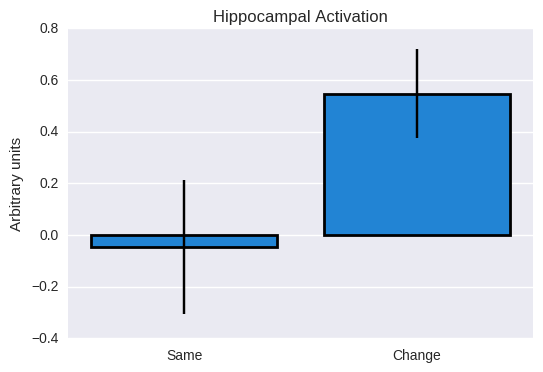

In [34]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats

print '##same mean'
print all_data_df['hp_same'].mean()
print '##change mean'
print all_data_df['hp_change'].mean()
print ""

print '##T-test: HPC Same vs. Change'
print stats.ttest_rel(all_data_df['hp_same'], all_data_df['hp_change'])
cohens_d = ((np.average(all_data_df['hp_same']) - np.average(all_data_df['hp_change'])) 
            / (sqrt((np.std(all_data_df['hp_same'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_change'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Same', 'Change']
hp_means_allsubjs = [all_data_df['hp_same'].mean(), 
                     all_data_df['hp_change'].mean()]
hp_sem_allsubjs = [all_data_df['hp_same'].std()/(np.sqrt(len(sids))), 
                   all_data_df['hp_change'].std()/(np.sqrt(len(sids)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, hp_means_allsubjs, yerr = hp_sem_allsubjs, 
                color = "#0487f2", ecolor = 'black', linewidth = 2)

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
#ax.set_xlabel("Trial Type")
ax.set_title("Hippocampal Activation")

plt.show()

##T-test: HPC Same vs. Change
Ttest_relResult(statistic=2.5120121202027077, pvalue=0.021196395893527488)
Cohen's d =  0.853229965751


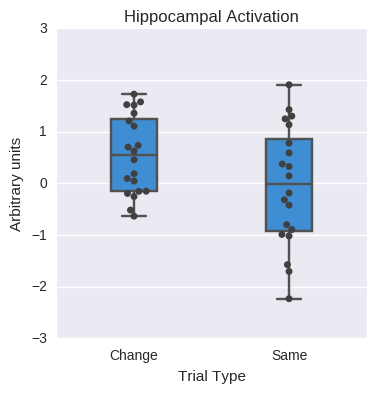

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats
from math import sqrt

print '##T-test: HPC Same vs. Change'
print stats.ttest_rel(all_data_df['hp_change'], all_data_df['hp_same'])
cohens_d = ((np.average(all_data_df['hp_change']) - np.average(all_data_df['hp_same'])) 
            / (sqrt((np.std(all_data_df['hp_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['hp_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d


N = 2
conditions = ['Change', 'Same']

hp_allsubjs = [all_data_df['hp_change'], 
               all_data_df['hp_same']]

ind = np.arange(N)
pal = ["#30b55c", "#e06243"]
pal = sns.color_palette(pal)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Hippocampal Activation")
plt.show()


## Caudate Activation: Same vs. Change

##same mean
-1.06541211531
##change mean
-0.00107700605877

##T-test: Caudate same vs. change
Ttest_relResult(statistic=-3.2413485183384814, pvalue=0.0042964338634194363)


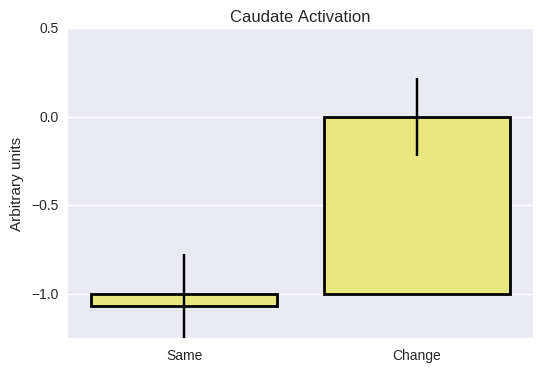

In [33]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
from scipy import stats

print '##same mean'
print all_data_df['caudate_same'].mean()
print '##change mean'
print all_data_df['caudate_change'].mean()
print ""

print '##T-test: Caudate same vs. change'
print stats.ttest_rel(all_data_df['caudate_same'], all_data_df['caudate_change'])


N = 2
conditions = ['Same', 'Change']
caudate_means_allsubjs = [all_data_df['caudate_same'].mean(), 
                     all_data_df['caudate_change'].mean()]
caudate_sem_allsubjs = [all_data_df['caudate_same'].std()/(np.sqrt(len(sids))), 
                   all_data_df['caudate_change'].std()/(np.sqrt(len(sids)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, np.array(caudate_means_allsubjs)+1, yerr = caudate_sem_allsubjs, 
                color = "#f9f96d", ecolor = 'black', linewidth = 2, bottom = -1)

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
ax.set_ylim(-1.25,0.5)
#ax.set_xlabel("Trial Type")
ax.set_title("Caudate Activation")

plt.show()

##T-test: Caudate same vs. change
Ttest_relResult(statistic=3.2413485183384814, pvalue=0.0042964338634194363)
Cohen's d =  1.30595185058


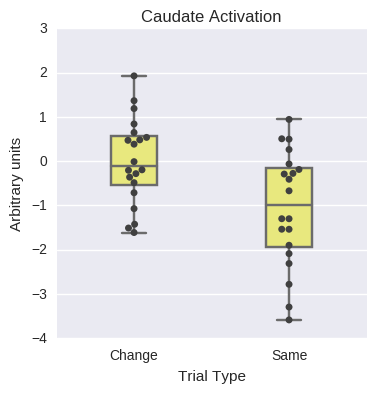

In [10]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats
from math import sqrt

print '##T-test: Caudate same vs. change'
print stats.ttest_rel(all_data_df['caudate_change'], all_data_df['caudate_same'])
cohens_d = ((np.average(all_data_df['caudate_change']) - np.average(all_data_df['caudate_same'])) 
            / (sqrt((np.std(all_data_df['caudate_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['caudate_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Change', 'Same']

caudate_allsubjs = [all_data_df['caudate_change'], 
                    all_data_df['caudate_same']]

ind = np.arange(N)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = caudate_allsubjs, color = "#f9f96d", width = 0.3)
ax2 = sns.swarmplot(data = caudate_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Caudate Activation")
plt.show()


## Putamen Activation: Same vs. Change

##same mean
-0.0994029946043
##change mean
0.308007379668

##T-test: Putamen same vs. change
Ttest_relResult(statistic=-1.9798244860764491, pvalue=0.062394994770398803)


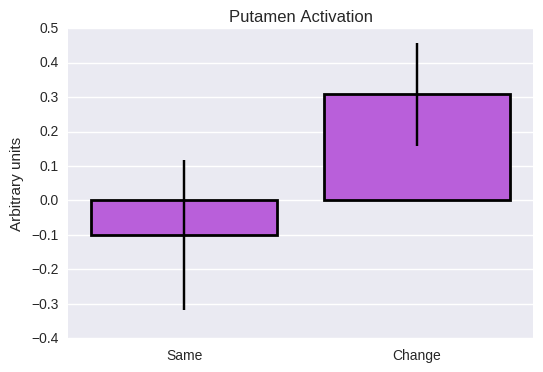

In [32]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
from scipy import stats

print '##same mean'
print all_data_df['putamen_same'].mean()
print '##change mean'
print all_data_df['putamen_change'].mean()
print ""

print '##T-test: Putamen same vs. change'
print stats.ttest_rel(all_data_df['putamen_same'], all_data_df['putamen_change'])

N = 2
conditions = ['Same', 'Change']
putamen_means_allsubjs = [all_data_df['putamen_same'].mean(), 
                          all_data_df['putamen_change'].mean()]
putamen_sem_allsubjs = [all_data_df['putamen_same'].std()/(np.sqrt(len(sids))), 
                        all_data_df['putamen_change'].std()/(np.sqrt(len(sids)))]

ind = np.arange(N)
width = 0.5

fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax = sns.barplot(ind, putamen_means_allsubjs, yerr = putamen_sem_allsubjs, 
                 color = "#c34aef", ecolor = 'black', linewidth = 2)

ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Arbitrary units")
#ax.set_ylim(0,-3)
#ax.set_xlabel("Trial Type")
ax.set_title("Putamen Activation")

plt.show()

##T-test: Putamen same vs. change
Ttest_relResult(statistic=1.9798244860764491, pvalue=0.062394994770398803)
Cohen's d =  0.688001951677


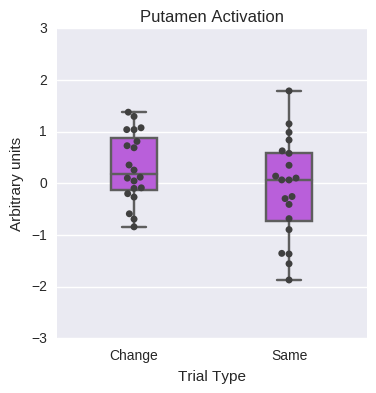

In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('muted')
#sns.set_style("darkgrid")
from scipy import stats
from math import sqrt

print '##T-test: Putamen same vs. change'
print stats.ttest_rel(all_data_df['putamen_change'], all_data_df['putamen_same'])
cohens_d = ((np.average(all_data_df['putamen_change']) - np.average(all_data_df['putamen_same'])) 
            / (sqrt((np.std(all_data_df['putamen_change'], ddof = 1)) 
            ** 2 + np.std(all_data_df['putamen_same'], ddof = 1) ** 2) / 2))
print "Cohen's d = ", cohens_d

N = 2
conditions = ['Change', 'Same']

putamen_allsubjs = [all_data_df['putamen_change'], 
                    all_data_df['putamen_same']]

ind = np.arange(N)

fig, ax = plt.subplots(figsize = (4,4))
ax0 = sns.boxplot(data = putamen_allsubjs, color = "#c34aef", width = 0.3)
ax2 = sns.swarmplot(data = putamen_allsubjs, color='.25')

ax.set_xticklabels(conditions)
ax.set_xticks(ind)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Arbitrary units")
ax.set_title("Putamen Activation")
plt.show()


## Scatterplots -- Brain (Fixed 1) --> Behavior (Fixed 2)

### Hippocampus

SAME (0.32417343107106161, 0.16319856819909553)
CHANGE (0.24193535914800593, 0.30410504145518336)


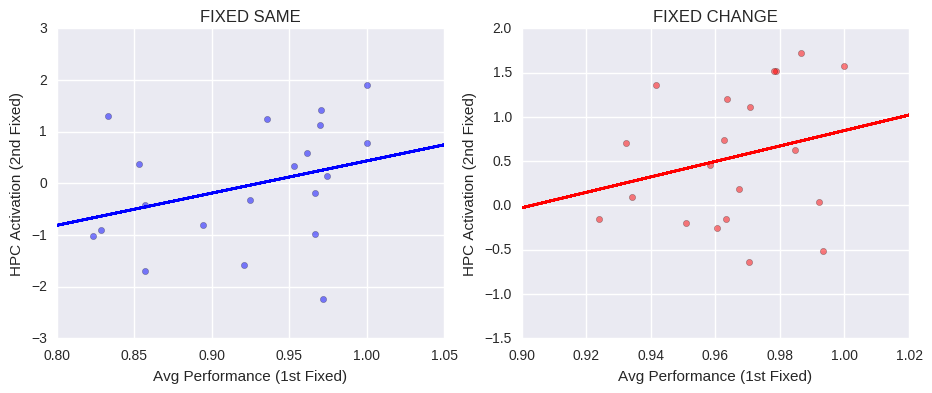

In [15]:
x = all_prop_same
y = all_data_df['hp_same']
x1 = all_prop_change
y1 = all_data_df['hp_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('HPC Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('HPC Activation (2nd Fixed)')
ax1.set_xlabel('Avg Performance (1st Fixed)')
ax1.set_title('FIXED CHANGE')
#print dir(ax)
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-3, 3)
ax1.set_xlim(0.90, 1.02)
ax1.set_ylim(-1.5, 2.0)


print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (0.32417343107106161, 0.16319856819909553)
CHANGE (0.24193535914800593, 0.30410504145518336)


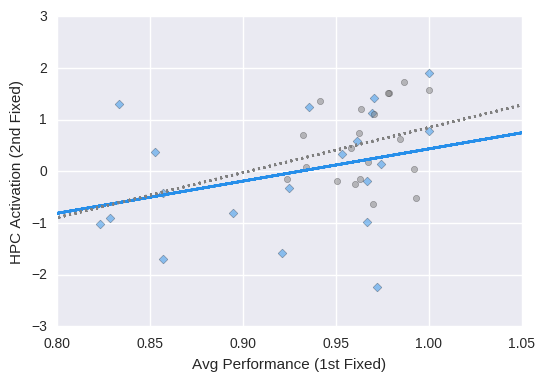

In [16]:
x = all_prop_same
y = all_data_df['hp_same']
x1 = all_prop_change
y1 = all_data_df['hp_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "#278fea")
ax.scatter(x, y, c = "#278fea", alpha = 0.5, marker = 'D')
ax.set_ylabel('HPC Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_ylabel('HPC Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-3, 3)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (0.24193535914800593, 0.30410504145518336)


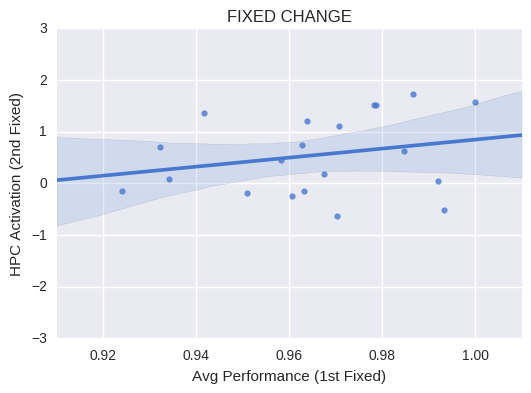

In [17]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'hp_change', data=all_data_df)
ax.set_ylabel('HPC Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_title('FIXED CHANGE')
ax.set_ylim(-3,3)
#plt.savefig('/home/arenf001/HPC_fixed_change.png', dpi = 1080)
plt.show()

SAME (0.32417343107106161, 0.16319856819909553)


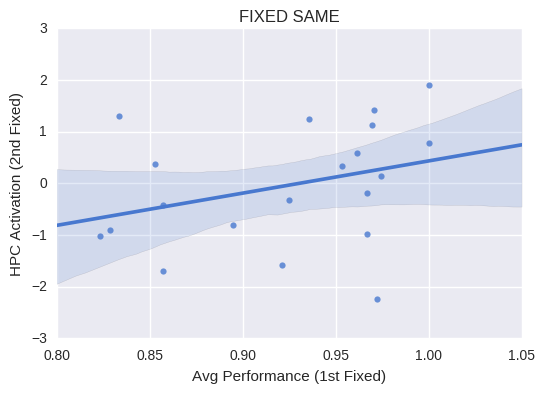

In [18]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'hp_same', data=all_data_df)
ax1.set_ylabel('HPC Activation (2nd Fixed)')
ax1.set_xlabel('Avg Performance (1st Fixed)')
ax1.set_title('FIXED SAME')
#plt.savefig('/home/arenf001/HPC_fixed_same.png', dpi = 1080)
plt.show()

### Caudate

SAME (-0.17682725850372871, 0.45579794375802418)
CHANGE (7.9851495162424604e-05, 0.99973341814647065)


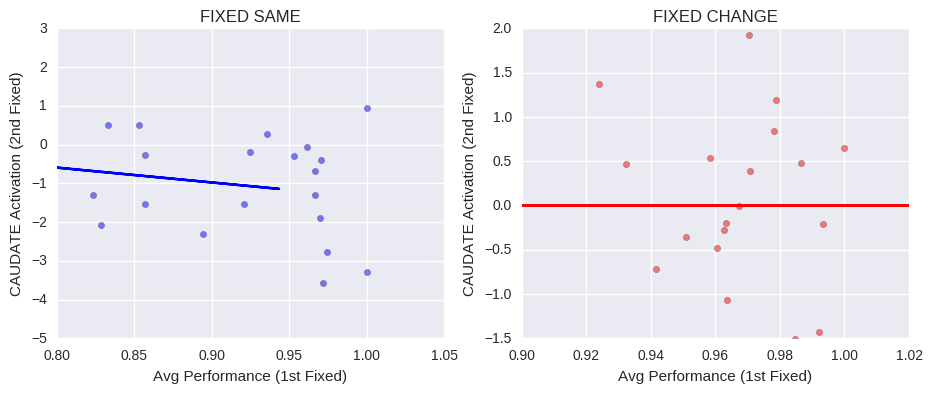

In [23]:
x = all_prop_same
y = all_data_df['caudate_same']
x1 = all_prop_change
y1 = all_data_df['caudate_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('CAUDATE Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('CAUDATE Activation (2nd Fixed)')
ax1.set_xlabel('Avg Performance (1st Fixed)')
ax1.set_title('FIXED CHANGE')
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-5, 3)
ax1.set_xlim(0.90, 1.02)
ax1.set_ylim(-1.5, 2.0)

print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (-0.17682725850372871, 0.45579794375802418)
CHANGE (7.9851495162424604e-05, 0.99973341814647065)


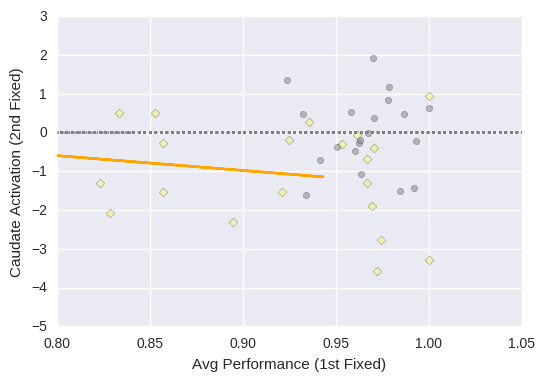

In [20]:
x = all_prop_same
y = all_data_df['caudate_same']
x1 = all_prop_change
y1 = all_data_df['caudate_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "orange")
ax.scatter(x, y, c = "#f9f96d", alpha = 0.5, marker = 'D')
ax.set_ylabel('Caudate Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-5, 3)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (7.9851495162424604e-05, 0.99973341814647065)


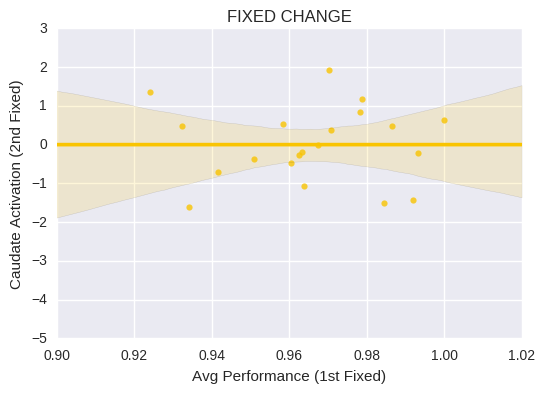

In [21]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'caudate_change', data=all_data_df, color = "#f9c402")
ax.set_ylabel('Caudate Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_ylim(-5,3)
ax.set_title('FIXED CHANGE')
#plt.savefig('/home/arenf001/caudate_fixed_change.png', dpi = 1080)
plt.show()

SAME (-0.17682725850372871, 0.45579794375802418)


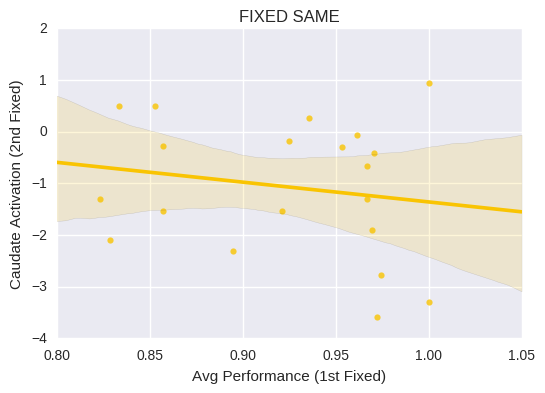

In [22]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'caudate_same', data=all_data_df, color = "#f9c402")
ax1.set_ylabel('Caudate Activation (2nd Fixed)')
ax1.set_xlabel('Avg Performance (1st Fixed)')
ax1.set_title('FIXED SAME')
#plt.savefig('/home/arenf001/caudate_fixed_same.png', dpi = 1080)
plt.show()

### Putamen

SAME (0.159258610625125, 0.50243263406370664)
CHANGE (0.34366938688910814, 0.13791539855839638)


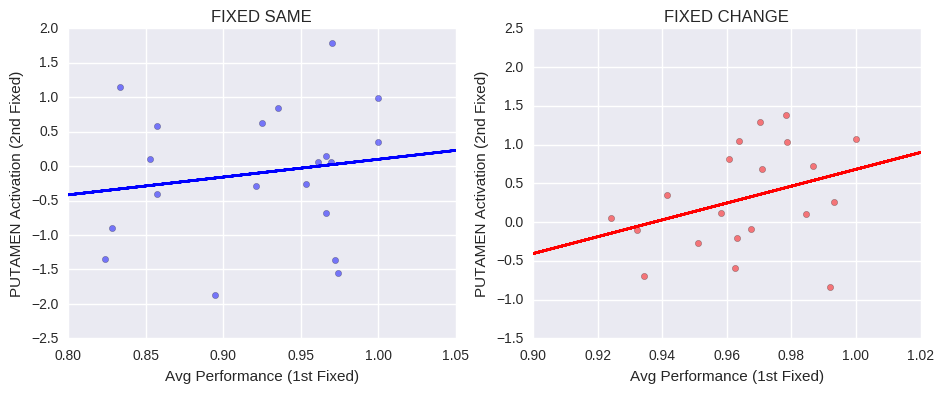

In [24]:
x = all_prop_same
y = all_data_df['putamen_same']
x1 = all_prop_change
y1 = all_data_df['putamen_change']

fig, (ax, ax1) = plt.subplots(ncols = 2, figsize=(11, 4), sharex = False, sharey = False)
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = 'blue')
ax.scatter(x, y, c = 'blue', alpha = 0.5)
ax.set_ylabel('PUTAMEN Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_title('FIXED SAME')
fit1 = np.polyfit(x1, y1, deg = 1)
ax1.plot(y1, fit1[0] * y1 + fit1[1], color = 'red')
ax1.scatter(x1, y1, c = 'red', alpha = 0.5)
ax1.set_ylabel('PUTAMEN Activation (2nd Fixed)')
ax1.set_xlabel('Avg Performance (1st Fixed)')
ax1.set_title('FIXED CHANGE')
ax.set_xlim(0.80, 1.05)
ax.set_ylim(-2.5, 2.0)
ax1.set_xlim(0.90, 1.02)
ax1.set_ylim(-1.5, 2.5)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

SAME (0.159258610625125, 0.50243263406370664)
CHANGE (0.34366938688910814, 0.13791539855839638)


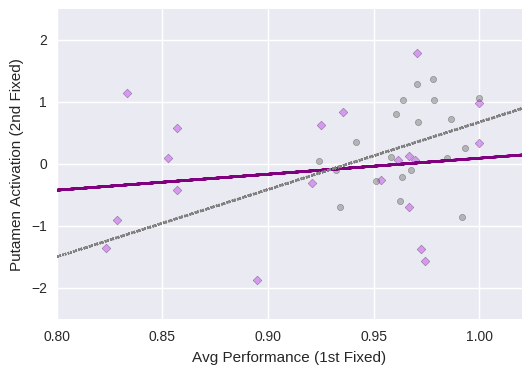

In [25]:
x = all_prop_same
y = all_data_df['putamen_same']
x1 = all_prop_change
y1 = all_data_df['putamen_change']

fig, ax = plt.subplots()
fit = np.polyfit(x, y, deg = 1)
ax.plot(y, fit[0] * y + fit[1], color = "purple")
ax.scatter(x, y, c = "#c34aef", alpha = 0.5, marker = 'D')
ax.set_ylabel('Putamen Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
fit1 = np.polyfit(x1, y1, deg = 1)
ax.plot(y1, fit1[0] * y1 + fit1[1], color = 'gray', linestyle = ":")
ax.scatter(x1, y1, c = "gray", alpha = 0.5)
ax.set_xlim(0.80, 1.02)
ax.set_ylim(-2.5, 2.5)
print 'SAME', pearsonr(x,y)
print 'CHANGE', pearsonr(x1,y1)

CHANGE (0.34366938688910814, 0.13791539855839638)


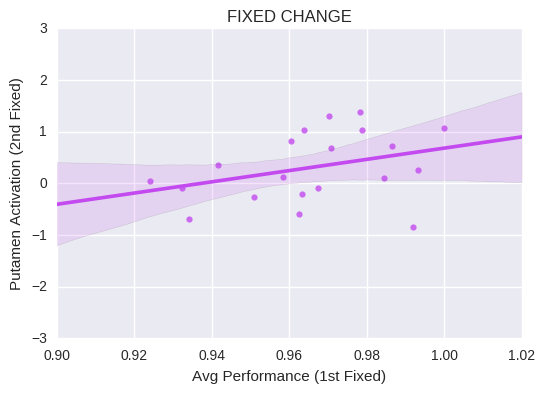

In [26]:
print 'CHANGE', pearsonr(x1,y1)
fig, ax = plt.subplots()
ax = sns.regplot(x = 'prop_change', y = 'putamen_change', data=all_data_df, color = "#c34aef")
ax.set_ylabel('Putamen Activation (2nd Fixed)')
ax.set_xlabel('Avg Performance (1st Fixed)')
ax.set_ylim(-3,3)
ax.set_title('FIXED CHANGE')
#plt.savefig('/home/arenf001/putamen_fixed_change.png', dpi = 1080)
plt.show()

SAME (0.159258610625125, 0.50243263406370664)


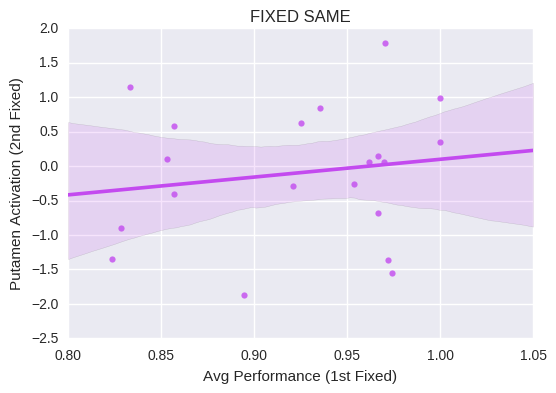

In [27]:
print 'SAME', pearsonr(x,y)
fig, ax = plt.subplots()
ax1 = sns.regplot(x = 'prop_same', y = 'putamen_same', data=all_data_df, color = "#c34aef")
ax1.set_ylabel('Putamen Activation (2nd Fixed)')
ax1.set_xlabel('Avg Performance (1st Fixed)')
ax1.set_title('FIXED SAME')
#plt.savefig('/home/arenf001/putamen_fixed_same.png', dpi = 1080)
plt.show()